# Application & Tips

기계학습을 실제로 사용하는 데 있어서의 팁들<br>

[1] Learning rate 조절법
    - Gradient Descent 방법에서 $\alpha(Learning\ rate)$에 관하여
        * Overshooting: Learning rate이 너무 큰 경우 값이 발산
        * small Learning rate: 학습 시간이 너무 길어지고, Local Minimum으로 수렴


[2] Data Preprocessing 방법
    - Zero-centering(영점 조절), Normalize(일반화) 필요
    - Standardization(정규화) 필요
        * X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()


[3] Overfitting 방지법
    - 테스트 데이터에 너무 최적화 되어 실제 문제를 해결하는데 도움이 안되는 경우
        * 매우 많은 훈련 데이터
        * Feature의 개수 줄이기
        * 일반화, Cost(Loss) 함수에 Regularization Term을 추가
$$
Cost(W, b) = \frac{1}{N} * \sum_{i=1}^ND(S(Wx_i + b),\ L_i) + \lambda \sum W^2 \\
$$
\begin{align*}
Regularization\ Strength:& \lambda\\
Cross-Entropy\ Function:& D(S, L) = -\sum_{i=1}^N L_i \log(S_i)\\
\end{align*}

\begin{align*}
S:& \hat{y},\ Estimated Value\\
L:& y,\ Real Value\\
\end{align*}

# Training/Testing Data Set

모델의 학습 결과를 평가하는 여러 방법

## 7:3
\begin{align*}
Training Data Set =& 7\\
Testing Data Set =& 3\\
\end{align*}

## 5: 2: 3
\begin{align*}
Training Data Set =& 5\\
Validation Data Set =& 2\\
Testing Data Set =& 3\\
\end{align*}

## Data From Online
웹을 통해 실시간으로 반영되는 데이터들을 주기적으로 이용해 훈련시키는 방식

In [3]:
# Learning rate와 Evaluation
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# Try to change learning_rate to large numbers
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e+2).minimize(cost)

# Try to change learning_rate to proper numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 6.20213 [[-0.82212889 -0.2921983   0.99953926]
 [ 1.22073817 -0.57642508 -1.41125774]
 [-0.65409166 -0.61371785 -1.53073502]]
1 5.95375 [[-0.82956803 -0.28849894  1.00327909]
 [ 1.19336796 -0.55903405 -1.4012785 ]
 [-0.68142021 -0.59512746 -1.52199686]]
2 5.7064 [[-0.83699054 -0.28481472  1.00701737]
 [ 1.16603386 -0.5416761  -1.39130235]
 [-0.70868862 -0.57659525 -1.5132606 ]]
3 5.4604 [[-0.84439123 -0.28115061  1.01075399]
 [ 1.13874745 -0.52436227 -1.38132977]
 [-0.73587525 -0.55814248 -1.50452673]]
4 5.21621 [[-0.85176331 -0.27751318  1.01448858]
 [ 1.11152375 -0.50710708 -1.37136126]
 [-0.76295125 -0.53979766 -1.49579561]]
5 4.97442 [[-0.85909796 -0.27391091  1.0182209 ]
 [ 1.08438241 -0.48992968 -1.36139739]
 [-0.78987867 -0.52159816 -1.4870677 ]]
6 4.73576 [[-0.86638403 -0.27035463  1.02195072]
 [ 1.05734885 -0.4728547  -1.35143876]
 [-0.81660891 -0.50359207 -1.47834361]]
7 4.50112 [[-0.87360775 -0.2668578   1.02567756]
 [ 1.03045487 -0.45591322 -1.34148622]
 [-0.84308153 -0.4

96 0.892275 [[-1.0955559  -0.28996754  1.27073514]
 [ 0.32247129 -0.39825398 -0.69116181]
 [-1.31659961 -0.54004222 -0.94190323]]
97 0.891164 [[-1.09648514 -0.2900835   1.27178037]
 [ 0.32089597 -0.39863178 -0.68920869]
 [-1.31590855 -0.54068041 -0.94195616]]
98 0.890108 [[-1.09740329 -0.29019004  1.27280498]
 [ 0.31936792 -0.39897841 -0.687334  ]
 [-1.31517732 -0.54127693 -0.94209087]]
99 0.889102 [[-1.09831083 -0.29028779  1.27381027]
 [ 0.31788436 -0.39929587 -0.68553299]
 [-1.31440842 -0.54183465 -0.94230199]]
100 0.888138 [[-1.09920847 -0.29037738  1.27479756]
 [ 0.31644264 -0.39958602 -0.68380111]
 [-1.31360435 -0.54235631 -0.9425844 ]]
101 0.887211 [[-1.10009682 -0.29045939  1.27576792]
 [ 0.31504023 -0.39985073 -0.68213403]
 [-1.31276751 -0.54284441 -0.94293314]]
102 0.886318 [[-1.10097647 -0.29053438  1.27672255]
 [ 0.31367472 -0.40009168 -0.68052757]
 [-1.31190002 -0.5433014  -0.94334358]]
103 0.885452 [[-1.10184777 -0.29060286  1.2776624 ]
 [ 0.31234381 -0.40031046 -0.678977

 [-1.20830107 -0.55657667 -1.03366709]]
194 0.82889 [[-1.1702354  -0.29102275  1.34647036]
 [ 0.23063587 -0.3967607  -0.60082   ]
 [-1.20719552 -0.55669117 -1.03465819]]
195 0.828366 [[-1.17093813 -0.29102126  1.34717155]
 [ 0.22986066 -0.39666161 -0.60014391]
 [-1.20609176 -0.55680597 -1.03564715]]
196 0.827843 [[-1.17164016 -0.29101983  1.34787214]
 [ 0.22908692 -0.39656207 -0.59946972]
 [-1.20498979 -0.55692101 -1.03663409]]
197 0.827322 [[-1.17234147 -0.29101846  1.34857202]
 [ 0.22831462 -0.39646205 -0.59879744]
 [-1.20388973 -0.55703628 -1.03761888]]
198 0.826802 [[-1.17304206 -0.29101714  1.3492713 ]
 [ 0.22754377 -0.39636159 -0.59812707]
 [-1.20279145 -0.55715185 -1.03860164]]
199 0.826285 [[-1.17374194 -0.29101586  1.34996986]
 [ 0.22677436 -0.39626068 -0.5974586 ]
 [-1.20169497 -0.55726767 -1.03958237]]
200 0.825769 [[-1.1744411  -0.29101464  1.35066783]
 [ 0.2260064  -0.39615932 -0.59679198]
 [-1.20060027 -0.55738372 -1.04056096]]
Prediction: [2 2 2]
Accuracy:  1.0


In [26]:
# 정규화 되지 않은 데이터를 사용할 경우 발생하는 문제
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# Normalized inputs with min-max scale

def MinMaxScalar(xy):
    for i in range(len(xy[0, :])):
        xy[:, i] = (xy[:, i] - xy[:, i].min()) / (xy[:, i].max() - xy[:, i].min())
        
    return xy
        
xy = MinMaxScalar(xy)

In [27]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  1.73159 
Prediction:
 [[-1.28072071]
 [-1.16435027]
 [-0.76322937]
 [-0.27435172]
 [-0.61033034]
 [-0.45572114]
 [ 0.12084627]
 [ 0.36087269]]
1 Cost:  1.73148 
Prediction:
 [[-1.28065753]
 [-1.16429114]
 [-0.76318049]
 [-0.27431452]
 [-0.61028552]
 [-0.45567811]
 [ 0.12087318]
 [ 0.36089844]]
2 Cost:  1.73137 
Prediction:
 [[-1.28059435]
 [-1.16423202]
 [-0.76313174]
 [-0.27427733]
 [-0.61024082]
 [-0.45563507]
 [ 0.12090012]
 [ 0.36092421]]
3 Cost:  1.73126 
Prediction:
 [[-1.28053105]
 [-1.16417289]
 [-0.76308286]
 [-0.2742402 ]
 [-0.61019611]
 [-0.45559204]
 [ 0.12092707]
 [ 0.36094999]]
4 Cost:  1.73115 
Prediction:
 [[-1.28046787]
 [-1.16411388]
 [-0.76303411]
 [-0.27420294]
 [-0.61015129]
 [-0.455549  ]
 [ 0.12095398]
 [ 0.36097574]]
5 Cost:  1.73104 
Prediction:
 [[-1.28040469]
 [-1.16405475]
 [-0.76298523]
 [-0.27416575]
 [-0.61010659]
 [-0.45550609]
 [ 0.12098092]
 [ 0.36100149]]
6 Cost:  1.73094 
Prediction:
 [[-1.28034139]
 [-1.16399574]
 [-0.76293635]
 [-0.2741285

# MNIST Dataset

## 손글씨를 인식 하는 예제

train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz


28 x 28 x 1 크기에 해당하는 이미지

X = tf.placeholder(tf.float32, [None, 28 * 28]) # MNIST 데이터 이미지는 개당 28 x 28 = 784bytes
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 결과는 0 - 9 숫자 한 개로, 총 10가지

# Training Epoch/Batch

* 1 epoch = 전체 데이터 셋을 한 번 학습 시키는 것을 말하는 단위
* batch size = 전체 데이터 셋을 나눠서 학습 시킬 때 나누는 크기
* iterations = batch 실행 단위

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.857064250
Epoch: 0002 cost = 1.106266916
Epoch: 0003 cost = 0.878474887
Epoch: 0004 cost = 0.768591303
Epoch: 0005 cost = 0.700155168
Epoch: 0006 cost = 0.651880484
Epoch: 0007 cost = 0.614535322
Epoch: 0008 cost = 0.585198540
Epoch: 0009 cost = 0.561074869
Epoch: 0010 cost = 0.540650426
Epoch: 0011 cost = 0.523245349
Epoch: 0012 cost = 0.508123450
Epoch: 0013 cost = 0.494344817
Epoch: 0014 cost = 0.482212727
Epoch: 0015 cost = 0.471422465
Learning Finished
Accuracy:  0.8877
Label: [5]
Prediction: [5]


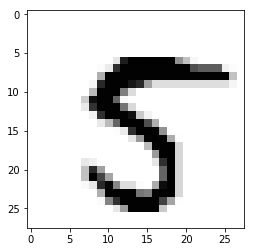

In [2]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 28 * 28]) # MNIST 데이터 이미지는 개당 28 x 28 = 784bytes
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 결과는 0 - 9 숫자 한 개로, 총 10가지

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypo = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypo), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypo, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
epochs = 15
batch_size = 100

with tf.Session() as sess:
    
    #Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    
    # Training
    for epoch in range(epochs):
        
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
        
    print('Learning Finished')
    
     # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, 
                                      feed_dict={
                                          X: mnist.test.images, 
                                          Y: mnist.test.labels
                                      }))
        
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypo, 1), feed_dict={X: mnist.test.images[r: r+1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys',interpolation='nearest')
    plt.show()